## Observations and Insights 

In [32]:
%matplotlib notebook
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study

# Display the data table for preview
mouse_study.head()
#mouse_study.describe()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
mouse_study.shape

(1893, 8)

In [34]:
# Checking the number of mice.
mice_count=mouse_study['Mouse ID'].nunique()
mice_count


249

In [35]:
#duplicate mice ID
#do i need ot make a groupby for MouseId and Timpoint?
mice_id=mouse_study['Mouse ID'].value_counts()
mice_id.head()

g989    13
m550    10
m546    10
u327    10
r944    10
Name: Mouse ID, dtype: int64

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#create a DataFrame?
#groupby?
#how many time points, at which points
timepoint_id=mouse_study['Timepoint'].value_counts()
number_of_time_ID_appears=mouse_study['Mouse ID'].value_counts()
number_of_time_ID_appears=number_of_time_ID_appears.reset_index()
# duplicate_mice
duplicate_mice_row=number_of_time_ID_appears.loc[number_of_time_ID_appears['Mouse ID']>len(timepoint_id)]
duplicate_mice_ID=duplicate_mice_row.iloc[0,0]
duplicate_mice_ID



'g989'

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_duplicate_mouse=mouse_study.loc[mouse_study['Mouse ID']==duplicate_mice_ID]
all_data_duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://stackoverflow.com/questions/34397982/pandas-dataframe-access-multiple-items-with-not-equal-to
#used "!=", for not equal to the duplicates I found up above
clean_data=mouse_study.loc[mouse_study['Mouse ID']!=duplicate_mice_ID]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
#How many mice are left?
# Checking the number of mice in the clean DataFrame.
#was 249
len(clean_data["Mouse ID"].unique())

248

In [40]:
# Combine the data into a single dataset
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean=clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median=clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance=clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std=clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem=clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_dict={
            'Mean':mean,
            'Median':median,
            'Variance':variance,
            'Std':std,
            'Standard_Error_of_Mean':sem
}

Summary_table=pd.DataFrame(Summary_dict)
Summary_table

,Mean,Median,Variance,Std,Standard_Error_of_Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
#This method produces everything in a single groupby
#followed along with teacher *new*
clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
# ({'Tumor Volume (mm3)': ['mean','median','variance','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

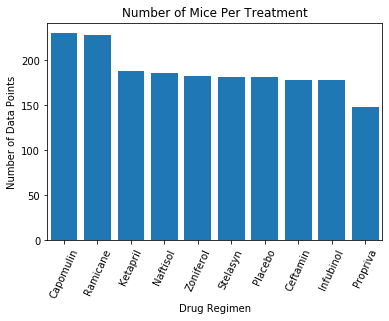

In [43]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#so look at chart above, already grouped by drug, use 1st column(0)
# counts=clean_data.loc[:,['Mouse ID','Drug Regimen']].drop_duplicates()['Drug Regimen'].value_counts()

#throughout the course of the study
counts=clean_data['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.bar(counts.index, counts)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=65)
plt.ylabel('Number of Data Points')
plt.title('Number of Mice Per Treatment')
plt.show()


In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_per_treatment=single_summary_table.iloc[:,0]
drug = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

x_axis = np.arange(len(drug))
plt.figure(figsize=(10,5))
plt.bar(x_axis,mice_per_treatment,color='g',alpha=.3)
plt.title('Number of Mice Per Treatment')
plt.xticks(x_axis,['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'],rotation='vertical')


NameError: name 'single_summary_table' is not defined

In [45]:
gender_break=clean_data['Sex'].value_counts()
gender_break

Male      958
Female    922
Name: Sex, dtype: int64

In [46]:
gender_count=clean_data.groupby(['Mouse ID','Sex'])
mouse_gender_df=pd.DataFrame(gender_count.size())
mouse_gender_df

#df with total count of mice by gender
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender

#create and format % male/female
mouse_gender["Percentage by Gender"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage by Gender"] = mouse_gender["Percentage by Gender"]

#gender_df
mouse_gender

,Total Count,Percentage by Gender
Sex,,
Female,123,49.596774
Male,125,50.403226


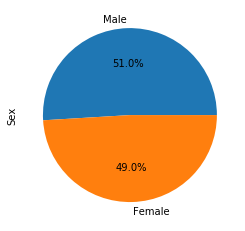

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender=clean_data['Sex'].value_counts()
mouse_gender.plot(kind='pie', autopct='%1.1f%%')
plt.show()

(-1.23480689036363,
 1.1150762930018054,
 -1.1466832156665685,
 1.1103903570382136)

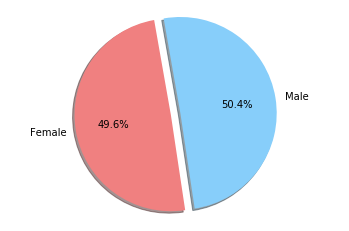

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female","Male"]
totals = [49.596774,50.403226]
colors = ['lightcoral', "lightskyblue"]
explode = (0.1, 0)
plt.pie(totals, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [49]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_time=clean_data.loc[:,["Mouse ID", "Timepoint"]].groupby('Mouse ID').max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_study=pd.merge(max_time, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

max_time_study


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in regimen:
    
#     filter_df=max_time_study.loc[:,"Drug Regimen"]=='Capomulin'
# filter by each drug regimen
    filter_df=max_time_study.loc[:,"Drug Regimen"]==each_drug
    four_quantiles=[.25,.5,.75]
# create new df based on drug filter and only take Tumor Volume column
    one_drug_tumor_volume=max_time_study.loc[filter_df,'Tumor Volume (mm3)']
#     append tumor volume into a list 
    tumor_vol_list.append(one_drug_tumor_volume)
# not related to the above line but calculate the quantiles based on the Tumor Volume for a single drug    
    quartiles=one_drug_tumor_volume.quantile(four_quantiles)
#df.loc(row, col)
    lowerq=quartiles.loc[.25]
    upperq=quartiles.loc[.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
# locate the rows which contain mice on each drug and get the tumor volumes    
    filter_df=(one_drug_tumor_volume>upper_bound) |(one_drug_tumor_volume<lower_bound)
#     one_drug_tumor_volume.loc[filter_df]
    outlier_count=len(one_drug_tumor_volume.loc[filter_df])
    
# Determine outliers using upper and lower bounds
    print(f'There are {outlier_count} outliers for {each_drug}')
    


There are 0 outliers for Capomulin
There are 0 outliers for Ramicane
There are 1 outliers for Infubinol
There are 0 outliers for Ceftamin


In [52]:
quartiles

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

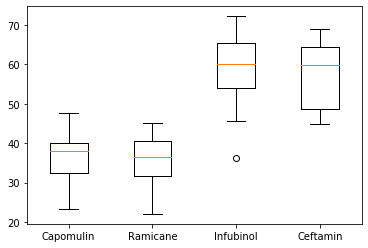

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, labels=regimen)
plt.show()

## Line and Scatter Plots

In [54]:
filter_df=clean_data.loc[:,"Drug Regimen"]=="Capomulin"
capomulin=clean_data.loc[filter_df,:]
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


'b128'

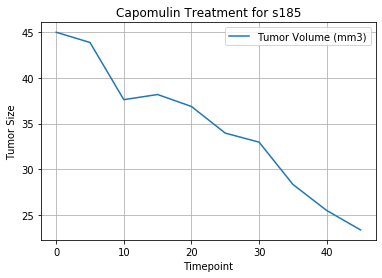

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
filter_df=clean_data.loc[:,"Drug Regimen"]=="Capomulin"
capomulin=clean_data.loc[filter_df,:]
filter_df=capomulin.loc[:,"Mouse ID"]=="s185"
one_mouse=capomulin.loc[filter_df,:]
# x,y
one_mouse.plot("Timepoint", "Tumor Volume (mm3)")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Size')
plt.title('Capomulin Treatment for s185')
plt.grid()

capomulin_regimen=clean_data.set_index('Drug Regimen').loc['Capomulin',:].sort_values(['Mouse ID','Timepoint'])
capomulin_regimen.head()

single_mouse=capomulin_regimen.iloc[0,0]
single_mouse

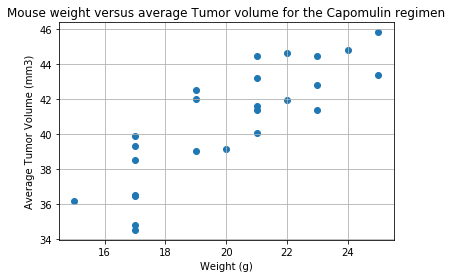

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# capomulin
capomulin_avg=capomulin[['Mouse ID','Tumor Volume (mm3)', 'Weight (g)']].groupby('Mouse ID').mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.title('Mouse weight versus average Tumor volume for the Capomulin regimen')
plt.show()

# average_tumor_vol=capomulin_regimen.groupby('Mouse ID').mean()
# x_values=average_tumor_vol.iloc[:,1]
# y_values=average_tumor_vol.iloc[:,4]
# plt.scatter(x=x_values,y=y_values,marker='o',c='r')


## Correlation and Regression

In [57]:
corr=round(sts.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f'Correlation is {corr}')

Correlation is 0.84


In [58]:
m, b, r, p, std=sts.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
sts.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

NameError: name 'line_eq' is not defined

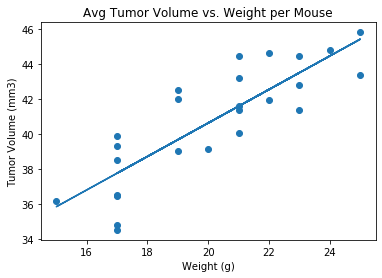

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# y=mx+b
m, b, r, p, std=sts.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
# line regress-LinregressResult(slope=0.9544396890241045, 
    #intercept=21.552160532685015, 
    # rvalue=0.8419363424694718, 
    # pvalue=1.3225722434712642e-07, 
    # stderr=0.1275435903320134)
y_pred=m*capomulin_avg['Weight (g)']+b
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_pred)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Avg Tumor Volume vs. Weight per Mouse')
plt.annotate(line_eq,(15,35),fontsize=20,color="red")
plt.show()